In [2]:
import mnist
import scipy.misc
import numpy as np
from copy import deepcopy
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

In [14]:
fashion_train_df = pd.read_csv('./data/fashionmnist/fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('./data/fashionmnist/fashion-mnist_test.csv')

In [15]:
X_train = fashion_train_df.iloc[:,fashion_train_df.columns != 'label']
X_test = fashion_test_df.iloc[:,fashion_test_df.columns != 'label']
Y_train = fashion_train_df[['label']]
Y_test =  fashion_test_df[['label']]

In [16]:
data = X_train.transpose()

In [17]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [38]:
data.shape

(784, 60000)

In [18]:
k = 10

centroids = np.array([np.random.randint(0, 255, size=data.shape[0]) for i in range(k)])

print("Initial Centroids")
print(centroids)

Initial Centroids
[[110 125 175 ..., 157 121 125]
 [ 10 159 253 ...,  45 199  78]
 [238 201  64 ..., 236  37  24]
 ..., 
 [161  53  41 ..., 247 189  79]
 [ 19 162 126 ..., 198  29 224]
 [235 246 141 ..., 196 216  19]]


In [19]:
centroids.shape

(10, 784)

In [20]:
old_centroids = np.zeros(centroids.shape)

In [21]:
clusters       = np.zeros(data.shape[1])
error_function = dist(centroids, old_centroids, None)

In [22]:
error_function

13012.441200635643

In [23]:
error_function_plot = []

In [466]:
while max(error_function) > 10:
    
    print (error_function)
    
    error_function_plot.append(list(error_function))

    for i in range(len(clusters)):
        #clusters[i] = np.argmin([np.linalg.norm(data[i] - centroid) for centroid in centroids])  
        clusters[i] = np.argmin([euclidean_distances(np.array(data[i]).reshape(1,-1),centroid.reshape(1,-1)) for centroid in centroids])

    centroids_old = deepcopy(centroids)

    for i in range(k):
        points      = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        centroids[i] = np.array(np.mean(points, axis= 0))

    error_function = euclidean_distances(centroids, old_centroids)

TypeError: 'numpy.float64' object is not iterable

In [36]:
prev_error_function = 9999


while abs(prev_error_function - error_function) > 1:
    
    print (error_function)
    
    error_function_plot.append(error_function)

    for i in range(len(clusters)):
        clusters[i] = np.argmin([np.linalg.norm(data[i] - centroid) for centroid in centroids])  


    centroids_old = deepcopy(centroids)

    for i in range(k):
        points       = np.array([data[j] for j in range(data.shape[1]) if clusters[j] == i])
        centroids[i] = np.array(np.mean(points, axis= 0))

    prev_error_function = error_function
    error_function      = dist(centroids, old_centroids, None)

9486.67671
9481.87122882
9477.32267046
9473.48742544
9470.48546802
9467.07462736
9464.8347582
9462.69876938
9460.53058766


In [26]:
np.log(error_function_plot)

array([ 9.47366119,  9.14719957,  9.17991007,  9.18583298,  9.18208337,
        9.17829681,  9.17291018,  9.16791011,  9.16433675,  9.16157602,
        9.15970153,  9.1584337 ,  9.15764364])

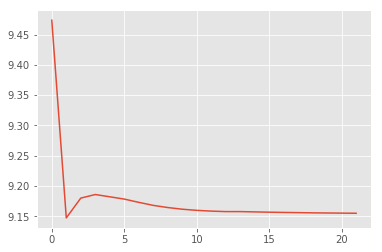

In [37]:
plt.plot(np.log(error_function_plot))

In [32]:
train_labels = Y_train['label']
purity_df = pd.DataFrame([clusters, train_labels]).transpose()
purity_df.columns = ['yhat_test', 'y_test']
purity_numerator = 0
purity_denominator = len(purity_df)

for cluster in purity_df['yhat_test'].unique():
    
    purity_numerator += int(purity_df[purity_df['yhat_test'] == cluster].groupby('y_test')\
                                .count()\
                                .sort_values('yhat_test', ascending=False)\
                                .iloc[0])
purity_numerator/purity_denominator

0.5884

In [35]:
gini_coeffs = np.zeros([len(purity_df['yhat_test'].unique()), 2])
i = 0

for cluster in clusters:

    if (i < k):
        
        gini_coeffs[i][0] = sum(((purity_df[purity_df['yhat_test'] == cluster].groupby('y_test')\
                                    .count()\
                                    .sort_values('yhat_test', ascending=False)\
                            /len(purity_df[purity_df['yhat_test'] == cluster]))\
                            **2)\
                            ['yhat_test'])

        gini_coeffs[i][1] = len(purity_df[purity_df['yhat_test'] == cluster])

        i += 1
    
    else: break

sum(gini_coeffs[:,0] * gini_coeffs[:,1]) / sum(gini_coeffs[:,1])

0.41918642309909382